# Código para la Predicción de Valores de Temperatura para AWOU5IMX

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

AttributeError: module 'matplotlib' has no attribute 'rcParams'

In [35]:
df = pd.read_csv("sensor_data.csv")
df = df[df["Machine_ID"] == "AWOU5IMX"]
df = df.set_index('Date_Time')[['Engine_Temperature']]
df.index = pd.to_datetime(df.index)

In [36]:
df.head()

,Engine_Temperature
Date_Time,
2019-06-16 01:24:00,46.847351
2019-06-16 01:39:00,46.834448
2019-06-16 01:54:00,46.775533
2019-06-16 02:09:00,46.615212
2019-06-16 02:24:00,46.614892


In [37]:
df.tail()

,Engine_Temperature
Date_Time,
2023-10-31 22:16:00,94.877246
2023-11-25 21:25:00,94.491143
2023-12-10 07:45:00,94.653869
2024-01-01 21:59:00,94.420936
2024-01-22 15:39:00,94.823564


<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

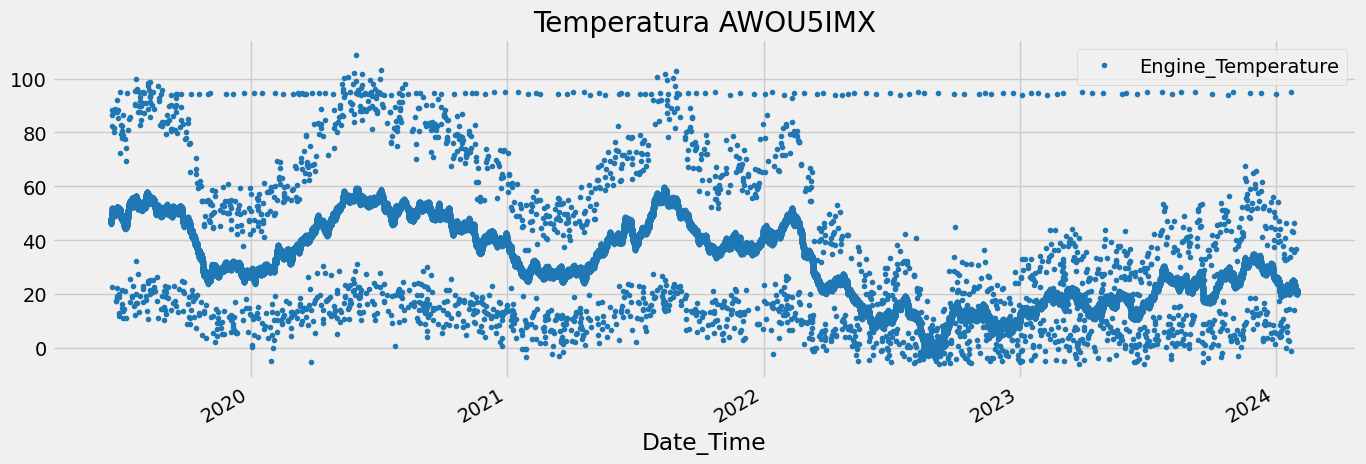

In [ ]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX')

In [39]:
# Suavizado con media móvil (por ejemplo, ventana de 7 días)
df['Smoothed_Temperature'] = df['Engine_Temperature'].rolling(window=7, min_periods=1).mean()

<Axes: title={'center': 'Temperatura AWOU5IMX'}, xlabel='Date_Time'>

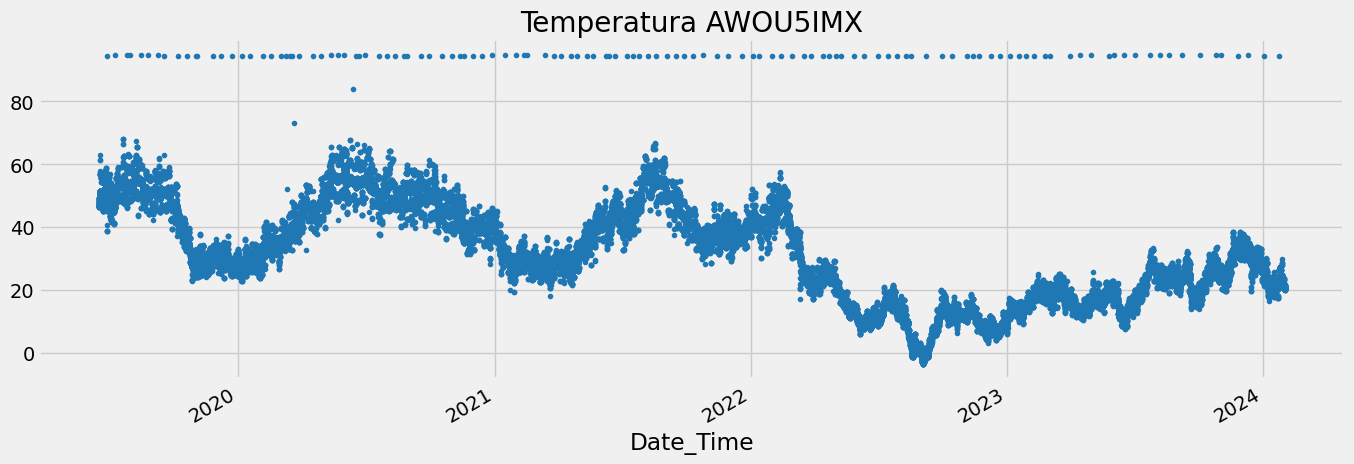

In [40]:
df['Smoothed_Temperature'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Temperatura AWOU5IMX')

# Train / Test Split

In [1]:
train = df.loc[df.index < '01-01-2023']
test = df.loc[df.index >= '01-01-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

NameError: name 'df' is not defined